<a 
href="https://colab.research.google.com/github/adilo231/Python-for-machine-learning/blob/main/Chap -4- Machine learning applications/2- Pre-processing.ipynb" 
target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre-processing


## Encodage

### Encodage LabelEncoder, MultiLabelBinarizer et LabelBinarizer

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, LabelBinarizer,MultiLabelBinarizer, OrdinalEncoder, OneHotEncoder
plt.style.use('ggplot')

In [2]:
y = np.array(['chat', 'chien', 'chat', 'oiseau','lion','chien','chat'])

encoder = LabelEncoder()
print(encoder.fit_transform(y))
print(encoder.inverse_transform(np.array([0, 0, 2,2,3,3,3,0,1,2])))

[0 1 0 3 2 1 0]
['chat' 'chat' 'lion' 'lion' 'oiseau' 'oiseau' 'oiseau' 'chat' 'chien'
 'lion']


In [4]:
encoder = LabelBinarizer()
encoder.fit_transform(y)

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0]])

In [4]:
y = np.array([['chat', 'poils'],
              ['lion', 'poils'],
              ['chien', 'poils'],
              ['vache', 'cuire'],
              ['chat', 'poils'],
              ['oiseau', 'plumes']])
encoder = MultiLabelBinarizer()
encoder.fit_transform(y)

array([[1, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 1, 0, 0]])

### Encodage Ordinal et Encodage OneHot

In [6]:
X = np.array([['chat', 'poils'],
              ['lion', 'poils'],
              ['chien', 'poils'],
              ['vache', 'cuire'],
              ['chat', 'poils'],
              ['oiseau', 'plumes']])

encoder = OrdinalEncoder()
encoder.fit_transform(X)

array([[0., 2.],
       [2., 2.],
       [1., 2.],
       [4., 0.],
       [0., 2.],
       [3., 1.]])

In [7]:
encoder = OneHotEncoder(sparse=False)
encoder.fit_transform(X)

array([[1., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 1., 0.]])

## Normalisation

In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [9]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data

### MinMaxScaler

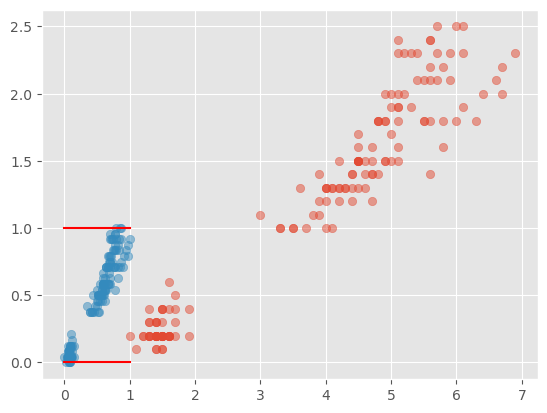

In [10]:
X_minmax = MinMaxScaler().fit_transform(X)

plt.scatter(X[:, 2], X[:, 3],alpha=0.5)
plt.scatter(X_minmax[:, 2], X_minmax[:, 3],alpha=0.5)
plt.plot(np.array([0,1]),np.array([1,1]),c='r')
plt.plot(np.array([0,1]),np.array([0,0]),c='r')

### StandardScaler

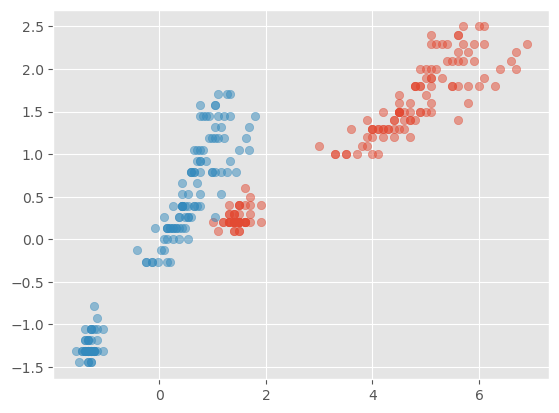

In [11]:
X_stdscl = StandardScaler().fit_transform(X)

plt.scatter(X[:, 2], X[:, 3],alpha=0.5)
plt.scatter(X_stdscl[:, 2], X_stdscl[:, 3],alpha=0.5)

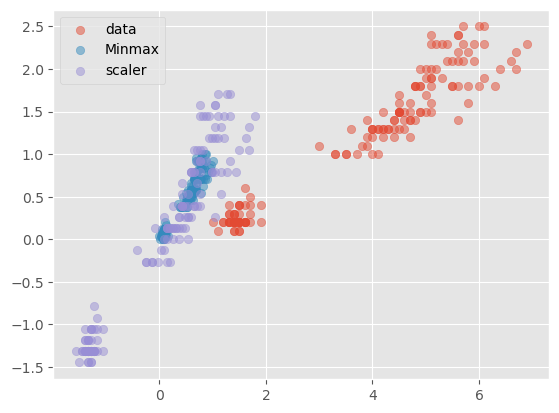

In [12]:
plt.scatter(X[:, 2], X[:, 3],alpha=0.5,label ='data')
plt.scatter(X_minmax[:, 2], X_minmax[:, 3],alpha=0.5,label='Minmax')
plt.scatter(X_stdscl[:, 2], X_stdscl[:, 3],alpha=0.5,label='scaler')
plt.legend()

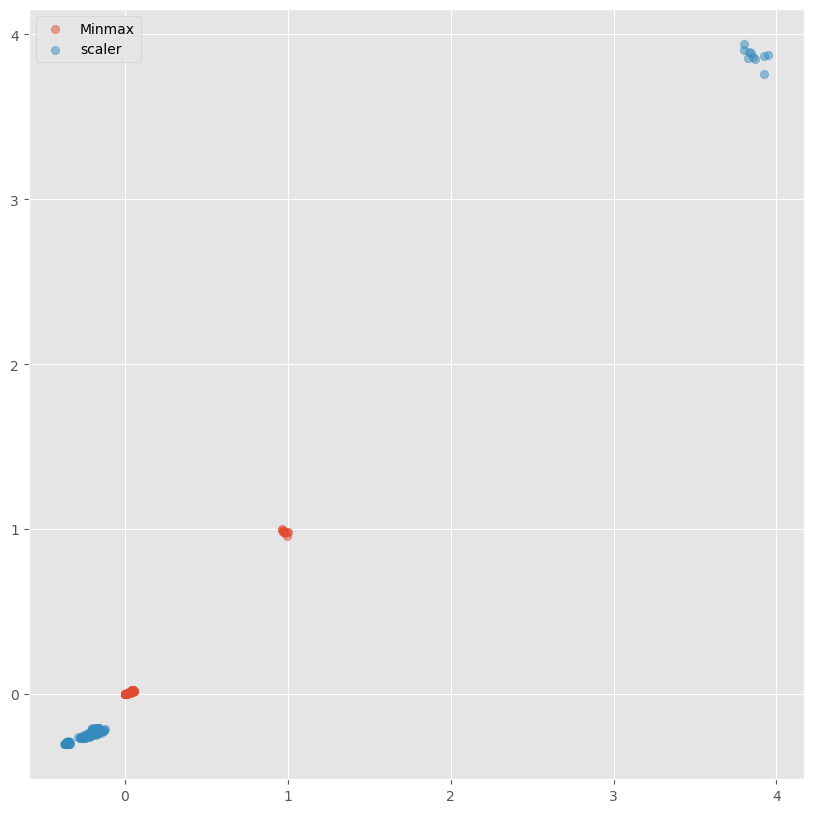

In [13]:
outliers = np.full((10,4),100)+ np.random.randn(10,4)
x = np.vstack((X,outliers))
X_minmax = MinMaxScaler().fit_transform(x)
X_stdscl = StandardScaler().fit_transform(x)
plt.figure(figsize=(10,10))

plt.scatter(X_minmax[:, 2], X_minmax[:, 3],alpha=0.5,label='Minmax')
plt.scatter(X_stdscl[:, 2], X_stdscl[:, 3],alpha=0.5,label='scaler')
plt.legend()

### RobustScaler

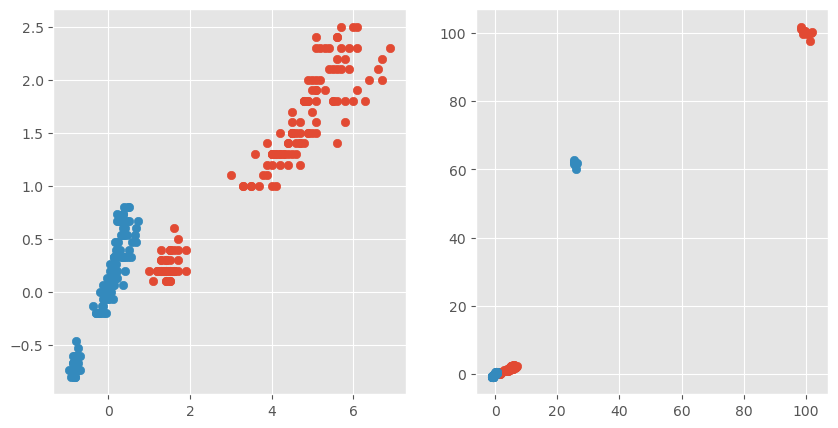

In [14]:
X_robust = RobustScaler().fit_transform(X)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(X[:, 2], X[:, 3])
plt.scatter(X_robust[:, 2], X_robust[:, 3])

X_robust = RobustScaler().fit_transform(x)
plt.subplot(1,2,2)
plt.scatter(x[:, 2], x[:, 3])
plt.scatter(X_robust[:, 2], X_robust[:, 3])

# 3. Polynomial Features

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

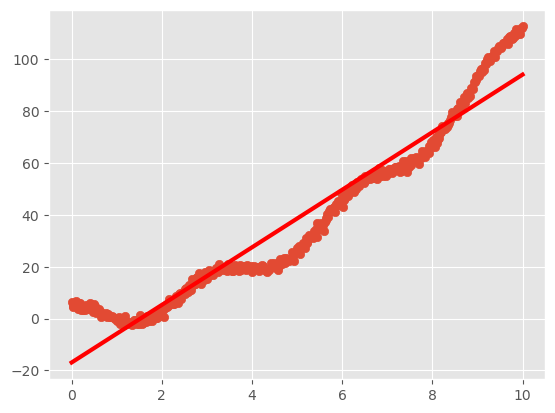

In [16]:
m = 500
X = np.linspace(0, 10, m).reshape((m, 1))
y = X**2+ X + 5*np.cos(2*X) + np.random.randn(m, 1)

model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred, c='r', lw=3)

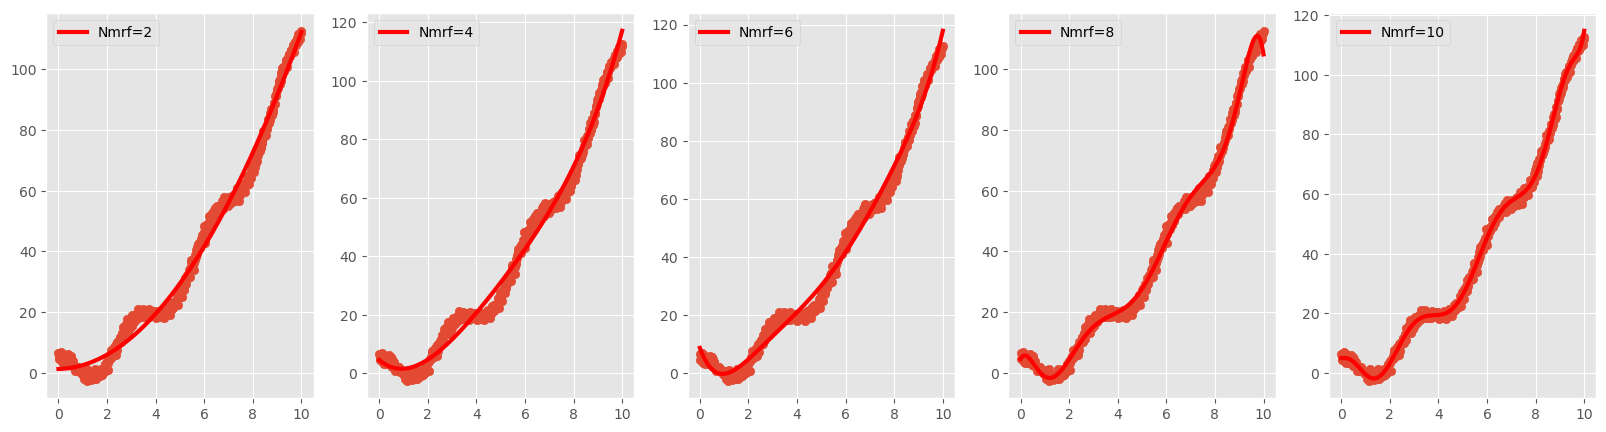

In [17]:
step = 2
plt.figure(figsize=(20,5))
for i in range(0,5):
    X_poly = PolynomialFeatures(step).fit_transform(X)
    model = LinearRegression().fit(X_poly, y)
    y_pred = model.predict(X_poly)
    plt.subplot(1,5,i+1)
    plt.scatter(X, y)
    plt.plot(X, y_pred, c='r', lw=3,label=f'Nmrf={step}')
    step+=2
    plt.legend()

## Discretisation

In [18]:
from sklearn.preprocessing import Binarizer, KBinsDiscretizer

In [19]:
X = np.linspace(0, 5, 10).reshape((10, 1))
X

array([[0.        ],
       [0.55555556],
       [1.11111111],
       [1.66666667],
       [2.22222222],
       [2.77777778],
       [3.33333333],
       [3.88888889],
       [4.44444444],
       [5.        ]])

In [20]:
np.hstack((X, Binarizer(threshold=3).fit_transform(X)))

array([[0.        , 0.        ],
       [0.55555556, 0.        ],
       [1.11111111, 0.        ],
       [1.66666667, 0.        ],
       [2.22222222, 0.        ],
       [2.77777778, 0.        ],
       [3.33333333, 1.        ],
       [3.88888889, 1.        ],
       [4.44444444, 1.        ],
       [5.        , 1.        ]])

In [21]:
KBinsDiscretizer(n_bins=6).fit_transform(X).toarray()

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

# Pipelines

In [22]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
from sklearn.datasets import load_iris

In [23]:

iris = load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [24]:
# Traditional pipline

#transformer
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)

#Estimator

model = SGDClassifier(random_state=0)
model.fit(X_train_transformed,y_train)

# test

X_test_transformed = scaler.transform(X_test)
print(model.score(X_test_transformed,y_test))

0.9736842105263158


## Cree une pipline

In [25]:
model = make_pipeline(StandardScaler(), SGDClassifier(random_state=0))

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9736842105263158

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
model = make_pipeline(PolynomialFeatures(),
                      StandardScaler(),
                      SGDClassifier(random_state=0))
params = {
    'polynomialfeatures__degree':[2, 3, 4],
    'sgdclassifier__penalty':['l1', 'l2']
}

grid = GridSearchCV(model, param_grid=params, cv=4)

grid.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('sgdclassifier',
                                        SGDClassifier(random_state=0))]),
             param_grid={'polynomialfeatures__degree': [2, 3, 4],
                         'sgdclassifier__penalty': ['l1', 'l2']})

In [28]:
grid.score(X_test, y_test)

0.9736842105263158

In [29]:
model = SGDClassifier(random_state=0)
model.fit(X_train,y_train)
print(model.score(X_test,y_test))

0.8421052631578947


## Exercise
### Exercice 1
En utilisant le dernier exemple, essayez les différents transformateurs de données de normalisation pour trouver le pipeline le plus précis

In [84]:

modelSS = make_pipeline(PolynomialFeatures(),
                      StandardScaler(),
                      SGDClassifier(random_state=0))

params = {
    'polynomialfeatures__degree':[2, 3, 4],
    'sgdclassifier__penalty':['l1', 'l2']
}
grid = GridSearchCV(modelSS, param_grid=params, cv=4)
grid.fit(X_train, y_train)
print('StandardScaler:', grid.score(X_test, y_test))


modelMM = make_pipeline(MinMaxScaler(),
                      SGDClassifier(random_state=0))
params = {
       'sgdclassifier__penalty':['l1', 'l2']
}
grid = GridSearchCV(modelMM, param_grid=params, cv=4)
grid.fit(X_train, y_train)
print('MinMaxScaler:', grid.score(X_test, y_test))


modelRS = make_pipeline(RobustScaler(),
                      SGDClassifier(random_state=0))
params = {
       'sgdclassifier__penalty':['l1', 'l2']
}
grid = GridSearchCV(modelRS, param_grid=params, cv=4)
grid.fit(X_train, y_train)
print('RobustScaler:', grid.score(X_test, y_test))

StandardScaler: 0.9736842105263158
MinMaxScaler: 0.9210526315789473
RobustScaler: 0.9736842105263158


### Exercice 2

Appliquez les différentes techniques apprises dans cette partie pour construire un pipeline sur le jeu de données du Titanic. essayez de trouver le meilleur transformateur de données avec un classificateur qui vous donne les meilleurs résultats.

In [179]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
#titanic = titanic[['survived', 'pclass', 'sex', 'age']]
titanic.dropna(axis=0, inplace=True)
titanic.head()
#titanic['sex'].replace(['male', 'female'], [0, 1], inplace=True)
y= titanic['survived']
X= titanic.drop('survived',axis=1)

In [180]:
encoder = OrdinalEncoder()
X=encoder.fit_transform(X)

In [181]:
X_train,X_test,y_train,y_test = train_test_split(X,y)
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape )

(136, 14) (46, 14) (136,) (46,)


In [182]:

modelSS = make_pipeline(PolynomialFeatures(),
                      StandardScaler(),
                      SGDClassifier(random_state=0))

params = {
    'polynomialfeatures__degree':[2, 3, 4],
    'sgdclassifier__penalty':['l1', 'l2']
}
grid = GridSearchCV(modelSS, param_grid=params, cv=5)
grid.fit(X_train, y_train)
print('StandardScaler:', grid.score(X_test, y_test))


modelMM = make_pipeline(MinMaxScaler(),
                      SGDClassifier(random_state=0))
params = {
       'sgdclassifier__penalty':['l1', 'l2']
}
grid = GridSearchCV(modelMM, param_grid=params, cv=5)
grid.fit(X_train, y_train)
print('MinMaxScaler:', grid.score(X_test, y_test))


modelRS = make_pipeline(RobustScaler(),
                      SGDClassifier(random_state=0))
params = {
       'sgdclassifier__penalty':['l1', 'l2']
}
grid = GridSearchCV(modelRS, param_grid=params, cv=5)
grid.fit(X_train, y_train)
print('RobustScaler:', grid.score(X_test, y_test))

StandardScaler: 1.0
MinMaxScaler: 1.0
RobustScaler: 0.9782608695652174


In [191]:
from sklearn.neighbors import KNeighborsClassifier
modelSS = make_pipeline(PolynomialFeatures(),
                      StandardScaler(),
                      KNeighborsClassifier())
params = {
    'polynomialfeatures__degree':[2, 3, 4],
    'kneighborsclassifier__n_neighbors': np.arange(1, 20),
    'kneighborsclassifier__metric': ['minkowski','euclidean', 'manhattan']
}
grid = GridSearchCV(modelSS, param_grid=params, cv=10)
grid.fit(X_train, y_train)
print('StandardScaler:', grid.score(X_test, y_test))

modelMM = make_pipeline(MinMaxScaler(),
                      KNeighborsClassifier())
params = {
       'kneighborsclassifier__n_neighbors': np.arange(1, 20),
    'kneighborsclassifier__metric': ['minkowski','euclidean', 'manhattan']
}
grid = GridSearchCV(modelMM, param_grid=params, cv=10)
grid.fit(X_train, y_train)
print('MinMaxScaler:', grid.score(X_test, y_test))


modelRS = make_pipeline(RobustScaler(),
                      KNeighborsClassifier())
params = {
       'kneighborsclassifier__n_neighbors': np.arange(1, 20),
    'kneighborsclassifier__metric': ['minkowski','euclidean', 'manhattan']
}
grid = GridSearchCV(modelRS, param_grid=params, cv=10)
grid.fit(X_train, y_train)
print('RobustScaler:', grid.score(X_test, y_test))



StandardScaler: 0.9347826086956522
MinMaxScaler: 0.9565217391304348
RobustScaler: 0.9347826086956522
